O primeiro passo para o estudo das ocultações estelares é a realização das predições (utilizando as efemérides) de quando e onde o asteroide estará visível, seguido por uma filtragem de quais são as predições de interesse (excluindo, por exemplo, os dias que esse só será visível durante o dia), para que assim as campanhas observacionais sejam organizadas. Nesse caso, utilizaremos como motivação a necessidade da observação do asteroide (2363) Cebriones para a determinação de sua curva de rotação, sendo nossas noites de interesses aquelas onde o nosso asteroide estará visível por mais tempo no céu!

Para o projeto do Módulo 2, estarei mostrando como essa importante etapa pode ser realizada, utilizando o que aprendemos em aula.

In [1]:
from astroquery.jplhorizons import Horizons
import pandas as pd
import pylab as pl
import numpy as np

Primeiramente, escolheremos nosso alvo e o definimos como a variável "obj", que nesse caso se tratará do asteroide (2363) Cebriones, um Troiano que se encontra no ponto de lagrange L5.

In [3]:
obj = Horizons(id='Cebriones', location='874', #O número 874 condiz ao Observatório Pico dos Dias
               epochs={'start':'2024-01-01', 'stop':'2025-01-01', 'step':'1h'}) #Escolhemos aqui o intervalo da busca, que será de um ano.

In [4]:
efem = obj.ephemerides(skip_daylight=True)
#Geramos aqui a efeméride do asteroide, adiocionando a condição de pular os resultados
#dos dias que coincidem com o dia, já que dessa forma o asteroide não poderá ser observado.

In [5]:
df = efem.to_pandas() #Passamos aqui o arquivo onde estão os resultados das efemerides
#para o formato pandas.

In [6]:
df 
#Podemos observar aqui que conseguimos um resultado muito grande de possíveis observações de 
#ocultações. Para filtrarmos as mais interessantes e termos resultados mais precisos
#podemos adicionar algumas condições :D

,targetname,datetime_str,datetime_jd,H,G,solar_presence,flags,RA,DEC,RA_app,...,r_3sigma,r_rate_3sigma,SBand_3sigma,XBand_3sigma,DoppDelay_3sigma,true_anom,hour_angle,alpha_true,PABLon,PABLat
0,2363 Cebriones (1977 TJ3),2024-Jan-01 00:00,2.460310e+06,9.02,0.15,,,352.61376,11.46781,352.91437,...,45.7146,0.000002,0.02,0.09,0.000305,95.4326,4.110282,10.5823,3.2875,13.6455
1,2363 Cebriones (1977 TJ3),2024-Jan-01 01:00,2.460311e+06,9.02,0.15,,,352.61934,11.46664,352.91993,...,45.7105,0.000002,0.03,0.09,0.000305,95.4358,5.112649,10.5809,3.2913,13.6430
2,2363 Cebriones (1977 TJ3),2024-Jan-01 02:00,2.460311e+06,9.02,0.15,,m,352.62495,11.46548,352.92552,...,45.7063,0.000002,0.03,0.09,0.000305,95.4390,6.115015,10.5794,3.2952,13.6405
3,2363 Cebriones (1977 TJ3),2024-Jan-01 03:00,2.460311e+06,9.02,0.15,,m,352.63060,11.46432,352.93115,...,45.7020,0.000002,0.03,0.09,0.000305,95.4423,7.117377,10.5780,3.2990,13.6380
4,2363 Cebriones (1977 TJ3),2024-Jan-01 04:00,2.460311e+06,9.02,0.15,,m,352.63628,11.46316,352.93681,...,45.6977,0.000002,0.03,0.09,0.000305,95.4455,8.119738,10.5765,3.3029,13.6355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4345,2363 Cebriones (1977 TJ3),2024-Dec-31 07:00,2.460676e+06,9.02,0.15,A,,22.59747,7.73679,22.92617,...,42.6312,0.000002,0.01,0.05,0.000284,123.7276,9.112841,10.2851,28.9130,-1.5587
4346,2363 Cebriones (1977 TJ3),2024-Dec-31 08:00,2.460676e+06,9.02,0.15,C,,22.59905,7.73559,22.92773,...,42.6340,0.000002,0.01,0.05,0.000284,123.7309,10.115475,10.2869,28.9149,-1.5604
4347,2363 Cebriones (1977 TJ3),2024-Dec-31 22:00,2.460676e+06,9.02,0.15,C,m,22.62051,7.71928,22.94933,...,42.6747,0.000002,0.02,0.06,0.000285,123.7770,0.152368,10.3120,28.9413,-1.5842
4348,2363 Cebriones (1977 TJ3),2024-Dec-31 23:00,2.460676e+06,9.02,0.15,A,,22.62195,7.71812,22.95076,...,42.6778,0.000002,0.02,0.06,0.000285,123.7803,1.155010,10.3139,28.9431,-1.5859


In [8]:
df= df[df['EL']>30] 
#A primeira condição que adicionamos foi a de selecionar apenas as ocultações com elevação
#maior que trinta. Realizamos esse processo fazendo uso da coluna 'EL', que a própria query
#nos fornece, que se trata justamente da elevação.

In [9]:
df
#Dessa forma, nosso Data Frame tem uma quantidade mais reduzida de linhas, o que torna o nosso
#trabalho mais fácil!

,targetname,datetime_str,datetime_jd,H,G,solar_presence,flags,RA,DEC,RA_app,...,r_3sigma,r_rate_3sigma,SBand_3sigma,XBand_3sigma,DoppDelay_3sigma,true_anom,hour_angle,alpha_true,PABLon,PABLat
9,2363 Cebriones (1977 TJ3),2024-Jan-01 22:00,2.460311e+06,9.02,0.15,C,,352.73838,11.44328,353.03905,...,45.6202,0.000002,0.03,0.09,0.000304,95.5034,2.162204,10.5495,3.3730,13.5906
10,2363 Cebriones (1977 TJ3),2024-Jan-01 23:00,2.460311e+06,9.02,0.15,A,,352.74400,11.44218,353.04465,...,45.6160,0.000002,0.03,0.09,0.000304,95.5066,3.164569,10.5481,3.3769,13.5881
20,2363 Cebriones (1977 TJ3),2024-Jan-02 22:00,2.460312e+06,9.02,0.15,C,,352.87614,11.41794,353.17682,...,45.5140,0.000002,0.03,0.09,0.000304,95.5806,2.218728,10.5118,3.4675,13.5309
21,2363 Cebriones (1977 TJ3),2024-Jan-02 23:00,2.460312e+06,9.02,0.15,A,,352.88184,11.41691,353.18251,...,45.5097,0.000002,0.03,0.10,0.000304,95.5838,3.221087,10.5102,3.4714,13.5284
31,2363 Cebriones (1977 TJ3),2024-Jan-03 22:00,2.460313e+06,9.02,0.15,C,,353.01594,11.39411,353.31663,...,45.4042,0.000002,0.03,0.10,0.000303,95.6577,2.275116,10.4716,3.5632,13.4714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338,2363 Cebriones (1977 TJ3),2024-Dec-31 00:00,2.460676e+06,9.02,0.15,,,22.58733,7.74530,22.91616,...,42.6098,0.000002,0.02,0.06,0.000284,123.7046,2.094342,10.2719,28.9001,-1.5467
4339,2363 Cebriones (1977 TJ3),2024-Dec-31 01:00,2.460676e+06,9.02,0.15,,,22.58868,7.74408,22.91750,...,42.6131,0.000002,0.02,0.06,0.000284,123.7079,3.096991,10.2738,28.9019,-1.5484
4347,2363 Cebriones (1977 TJ3),2024-Dec-31 22:00,2.460676e+06,9.02,0.15,C,m,22.62051,7.71928,22.94933,...,42.6747,0.000002,0.02,0.06,0.000285,123.7770,0.152368,10.3120,28.9413,-1.5842
4348,2363 Cebriones (1977 TJ3),2024-Dec-31 23:00,2.460676e+06,9.02,0.15,A,,22.62195,7.71812,22.95076,...,42.6778,0.000002,0.02,0.06,0.000285,123.7803,1.155010,10.3139,28.9431,-1.5859


In [10]:
df['datas']=0
#Nessa linha estamos criando uma coluna de zeros chamada 'datas' que irá nos auxiliar.

C:\Users\isabe\AppData\Local\Temp\ipykernel_34512\627166803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datas']=0


In [12]:
df['datas'] = df['datetime_str'].str.slice(0,11)
#Utilizamos a coluna 'datetime_str', que equivale a data e aos horários que o asteroide será visível
#para criarmos uma segunda coluna, denominada 'datas', que nos será útil para agruparmos os horários
#do mesmo dia em apenas uma contagem. Dessa forma, teremos o tempo diário da visibilidade do asteroide.
#Como estamos interessados apenas na contagem dos dias, podemos cortar os itens da coluna original,
#(datetime_str), de forma que utilizemos apenas a data, e não a hora.

C:\Users\isabe\AppData\Local\Temp\ipykernel_34512\4251517574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datas'] = df['datetime_str'].str.slice(0,11)


In [13]:
df 
#DataFrame com a coluna adicionada.

,targetname,datetime_str,datetime_jd,H,G,solar_presence,flags,RA,DEC,RA_app,...,r_rate_3sigma,SBand_3sigma,XBand_3sigma,DoppDelay_3sigma,true_anom,hour_angle,alpha_true,PABLon,PABLat,datas
9,2363 Cebriones (1977 TJ3),2024-Jan-01 22:00,2.460311e+06,9.02,0.15,C,,352.73838,11.44328,353.03905,...,0.000002,0.03,0.09,0.000304,95.5034,2.162204,10.5495,3.3730,13.5906,2024-Jan-01
10,2363 Cebriones (1977 TJ3),2024-Jan-01 23:00,2.460311e+06,9.02,0.15,A,,352.74400,11.44218,353.04465,...,0.000002,0.03,0.09,0.000304,95.5066,3.164569,10.5481,3.3769,13.5881,2024-Jan-01
20,2363 Cebriones (1977 TJ3),2024-Jan-02 22:00,2.460312e+06,9.02,0.15,C,,352.87614,11.41794,353.17682,...,0.000002,0.03,0.09,0.000304,95.5806,2.218728,10.5118,3.4675,13.5309,2024-Jan-02
21,2363 Cebriones (1977 TJ3),2024-Jan-02 23:00,2.460312e+06,9.02,0.15,A,,352.88184,11.41691,353.18251,...,0.000002,0.03,0.10,0.000304,95.5838,3.221087,10.5102,3.4714,13.5284,2024-Jan-02
31,2363 Cebriones (1977 TJ3),2024-Jan-03 22:00,2.460313e+06,9.02,0.15,C,,353.01594,11.39411,353.31663,...,0.000002,0.03,0.10,0.000303,95.6577,2.275116,10.4716,3.5632,13.4714,2024-Jan-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338,2363 Cebriones (1977 TJ3),2024-Dec-31 00:00,2.460676e+06,9.02,0.15,,,22.58733,7.74530,22.91616,...,0.000002,0.02,0.06,0.000284,123.7046,2.094342,10.2719,28.9001,-1.5467,2024-Dec-31
4339,2363 Cebriones (1977 TJ3),2024-Dec-31 01:00,2.460676e+06,9.02,0.15,,,22.58868,7.74408,22.91750,...,0.000002,0.02,0.06,0.000284,123.7079,3.096991,10.2738,28.9019,-1.5484,2024-Dec-31
4347,2363 Cebriones (1977 TJ3),2024-Dec-31 22:00,2.460676e+06,9.02,0.15,C,m,22.62051,7.71928,22.94933,...,0.000002,0.02,0.06,0.000285,123.7770,0.152368,10.3120,28.9413,-1.5842,2024-Dec-31
4348,2363 Cebriones (1977 TJ3),2024-Dec-31 23:00,2.460676e+06,9.02,0.15,A,,22.62195,7.71812,22.95076,...,0.000002,0.02,0.06,0.000285,123.7803,1.155010,10.3139,28.9431,-1.5859,2024-Dec-31


In [14]:
vezes= df['datas'].value_counts()
#Nessa linha, estamos fazendo exatamente o que foi descrito anteriormente: agrupando os horários
#que equivalem ao mesmo dia em apenas um dia, de forma a contar apenas uma vez, e utilizamos
#a função value_counts para contar quais as horas totais de cada dia, visando assim determinar
#qual seria os melhores dias (ou períodos) para a observação.

In [15]:
vezes
#Podemos observar abaixo as horas totais que nosso asteroide de interesse estará visível nos
#dias determinados anteriormente. Podemos ver que obtemos 240 datas diferentes.

2024-Nov-02    7
2024-Oct-07    7
2024-Oct-05    7
2024-Oct-04    7
2024-Oct-03    7
              ..
2024-Jun-02    1
2024-Jun-01    1
2024-May-31    1
2024-May-30    1
2025-Jan-01    1
Name: datas, Length: 240, dtype: int64

In [16]:
#Criamos uma lista chamada nums, que tem a mesma quantidade de itens que a quantidade de datas 
#que nos será útil para a melhor organização do eixo x, que equivale ao eixo das datas.
#(Tive um certo problema para ajeitar o eixo hahaha)
nums=list(range(0,250,9))

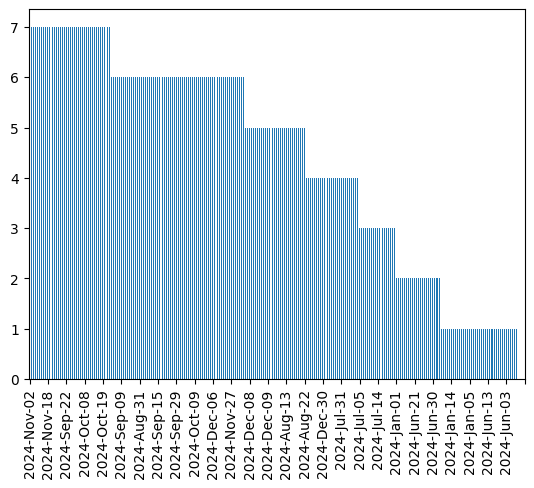

In [28]:
#Plotamos aqui a quantidade de horas por dia, mostrando as datas no eixo x com um passo de 9 dias 
#entre elas
vezes.plot.bar(x="Dias", y="Horas")
pl.xticks(nums, rotation=90)
pl.show()

#Podemos perceber que, aparentemente, os dias que mais somaram horas foram, por exemplo, dia 02/11/24,
#dia 18/11/24 e 19/10/24, que contaram com 7 horas.

In [29]:
#Utilizamos aqui a função describe para checarmos informações gerais sobre o nosso Data Frame
#e podemos checar aqui itens de interesse, como a ascesção e declinação máxima do asteroide no período.
df.describe()

,datetime_jd,H,G,RA,DEC,RA_app,DEC_app,RA_rate,DEC_rate,AZ,...,r_3sigma,r_rate_3sigma,SBand_3sigma,XBand_3sigma,DoppDelay_3sigma,true_anom,hour_angle,alpha_true,PABLon,PABLat
count,1.066000e+03,1.066000e+03,1.066000e+03,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,...,1066.000000,1.066000e+03,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000
mean,2.460579e+06,9.020000e+00,1.500000e-01,35.287596,13.805574,35.622269,13.929794,-4.981706,-8.546454,170.610242,...,29.953140,2.154128e-06,0.050338,0.183199,0.000200,116.197140,-0.066468,6.921908,28.531377,2.646705
std,6.584469e+01,2.434751e-13,2.999009e-15,50.536213,3.401942,50.531129,3.397506,12.195373,5.830861,148.000793,...,6.159783,4.985273e-08,0.024767,0.089306,0.000041,5.106988,1.855951,3.304597,4.016476,2.737536
min,2.460311e+06,9.020000e+00,1.500000e-01,22.299450,7.716960,22.621920,7.846550,-18.184700,-15.150000,0.240946,...,24.409200,2.100000e-06,0.000000,0.010000,0.000163,95.503400,-3.324138,0.331100,3.373000,-1.587600
25%,2.460544e+06,9.020000e+00,1.500000e-01,24.100462,10.785068,24.433590,10.913768,-15.507450,-13.702725,32.403151,...,25.279375,2.100000e-06,0.030000,0.110000,0.000169,113.427300,-1.670511,4.202725,28.435500,0.577400
50%,2.460588e+06,9.020000e+00,1.500000e-01,27.957960,14.394230,28.295885,14.518035,-8.414900,-10.040300,53.504318,...,26.211600,2.200000e-06,0.050000,0.190000,0.000175,116.821700,-0.169509,7.687550,29.135300,2.450150
75%,2.460628e+06,9.020000e+00,1.500000e-01,30.653795,17.191770,30.992743,17.312922,2.239806,-4.671995,322.434148,...,34.640325,2.200000e-06,0.070000,0.270000,0.000231,119.934475,1.490077,9.874950,30.124225,4.274825
max,2.460676e+06,9.020000e+00,1.500000e-01,356.020280,17.932560,356.322040,18.051050,26.510680,6.618974,359.915093,...,45.620200,2.200000e-06,0.080000,0.300000,0.000304,123.783600,3.455806,11.041800,30.491600,13.590600


In [32]:
df['dias'] = df['datetime_str'].str.slice(0,8)
#A fim de curiosidade, podemos agora agrupar as datas pelo mês, e não apenas por dia, a fim de 
#ver quantos horários temos em cada mês e dessa forma, checar qual o melhor mês para serem feitas as
#observações.

C:\Users\isabe\AppData\Local\Temp\ipykernel_34512\3716705278.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dias'] = df['datetime_str'].str.slice(0,8)


In [33]:
df

,targetname,datetime_str,datetime_jd,H,G,solar_presence,flags,RA,DEC,RA_app,...,SBand_3sigma,XBand_3sigma,DoppDelay_3sigma,true_anom,hour_angle,alpha_true,PABLon,PABLat,datas,dias
9,2363 Cebriones (1977 TJ3),2024-Jan-01 22:00,2.460311e+06,9.02,0.15,C,,352.73838,11.44328,353.03905,...,0.03,0.09,0.000304,95.5034,2.162204,10.5495,3.3730,13.5906,2024-Jan-01,2024-Jan
10,2363 Cebriones (1977 TJ3),2024-Jan-01 23:00,2.460311e+06,9.02,0.15,A,,352.74400,11.44218,353.04465,...,0.03,0.09,0.000304,95.5066,3.164569,10.5481,3.3769,13.5881,2024-Jan-01,2024-Jan
20,2363 Cebriones (1977 TJ3),2024-Jan-02 22:00,2.460312e+06,9.02,0.15,C,,352.87614,11.41794,353.17682,...,0.03,0.09,0.000304,95.5806,2.218728,10.5118,3.4675,13.5309,2024-Jan-02,2024-Jan
21,2363 Cebriones (1977 TJ3),2024-Jan-02 23:00,2.460312e+06,9.02,0.15,A,,352.88184,11.41691,353.18251,...,0.03,0.10,0.000304,95.5838,3.221087,10.5102,3.4714,13.5284,2024-Jan-02,2024-Jan
31,2363 Cebriones (1977 TJ3),2024-Jan-03 22:00,2.460313e+06,9.02,0.15,C,,353.01594,11.39411,353.31663,...,0.03,0.10,0.000303,95.6577,2.275116,10.4716,3.5632,13.4714,2024-Jan-03,2024-Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338,2363 Cebriones (1977 TJ3),2024-Dec-31 00:00,2.460676e+06,9.02,0.15,,,22.58733,7.74530,22.91616,...,0.02,0.06,0.000284,123.7046,2.094342,10.2719,28.9001,-1.5467,2024-Dec-31,2024-Dec
4339,2363 Cebriones (1977 TJ3),2024-Dec-31 01:00,2.460676e+06,9.02,0.15,,,22.58868,7.74408,22.91750,...,0.02,0.06,0.000284,123.7079,3.096991,10.2738,28.9019,-1.5484,2024-Dec-31,2024-Dec
4347,2363 Cebriones (1977 TJ3),2024-Dec-31 22:00,2.460676e+06,9.02,0.15,C,m,22.62051,7.71928,22.94933,...,0.02,0.06,0.000285,123.7770,0.152368,10.3120,28.9413,-1.5842,2024-Dec-31,2024-Dec
4348,2363 Cebriones (1977 TJ3),2024-Dec-31 23:00,2.460676e+06,9.02,0.15,A,,22.62195,7.71812,22.95076,...,0.02,0.06,0.000285,123.7803,1.155010,10.3139,28.9431,-1.5859,2024-Dec-31,2024-Dec


In [36]:
#Aqui iremos agrupar os horários de acordo com seu mês
vezes2= df['dias'].value_counts()

In [38]:
#E aqui finalmente podemos ver quais os meses com mais horários, que são os meses de Outubro e Novembro
#correspondendo, assim, ao gráfico obtido anteriormente :D.
vezes2

2024-Oct    203
2024-Nov    198
2024-Sep    185
2024-Aug    157
2024-Dec    151
2024-Jul     98
2024-Jun     44
2024-Jan     26
2024-May      3
2025-Jan      1
Name: dias, dtype: int64